# Case Study: Traffic Data Analysis

## Why Traffic Data?
- While the ABI program focuses on private sector industries like marketing, retail, etc., transportation is a very important industry that exists both in the private and public sector.
- This industry is **ripe for disruption** from a data perspective
- Every city and region has their own transportation organization (Metrolinx, TTC, Hamilton Street Railway, Ottawa-Carleton Transpo, etc.)
- Private companies are also very interested in transportation, specifically traffic (Uber, Lyft, Lime, Google, Waze, etc.)
- It is the instructors favourite industry for data analysis
- There are lots of public data from many regions related to transportation and traffic!



# Reminder: How to Take this Course

In this course, we will be learning programming and data analysis. These subjects involve theory and practice. The ABI program focuses on PRACTICE.
- Save a copy of this Notebook in your Drive
- Write and edit code in your Notebook
- Ask as many questions as you have (this is an intro course, there are NO dumb questions)
- Bring your own problems and ask questions on how to approach them (data analysis problem at work or school)

If you do not do these things, you will not retain much from this course. [Studies have shown](https://www.psychotactics.com/art-retain-learning/) that you retain:

- 75% of what you learn through practice
- 50% of what you learn through discussion with others
- 30% of what you learn through a demonstration
- 10% of what you learn from reading
- 5% of what you learn from a lecture

### Recommendations

* Learning Python requires context. **Experiment** with your creativity when learning it and use any search engine (Google, Bing, etc.) to explore the concept further with different examples.

* **Practice** makes perfect. When exploring a programming concept, try to test it with different approaches to understand what works and what does not and why it does so.

* Do not be afraid to **test the limits**. You can create a backup copy of this file and if anything goes wrong, you can always use the backup copy.


## Do you want to retain 75% of this course or 30%? The choice is yours.

---



# The Process

1. **Understand the problem.** We're going to read the case study and try to understand what is being asked of us. 
2. **Collect the data.** In this case study, the data has already been collected. We will summarize how the data was collected.
3. **Import and explore the Data.** We will import the data into Pandas and go through some README files to understand it.
4. **Define metrics for analysis.** It is important that we define some metrics to analyze before we start the analysis. This helps reduce the bias in our analysis.
5. **Clean the data.** We will slice and clean the data to prepare it for our analysis.
6. **Visualize the data.** We will make some simple visualizations to analyze the data.
7. **Generalize the work.** We will turn most of our code into functions that can be used in other analyses.

# The Problem

## King Street Transit Pilot
<img src='https://www.toronto.ca/wp-content/uploads/2019/06/9748-SPER-3866-04-1024x338.jpg' width=600>

The King Street Transit Pilot, also known as the "The King Street Transit Priority Corridor" is a project in the City of Toronto that aims to reduce traffic by diverting car traffic so that streetcars can go faster and other forms of transportation (cyclists, pedestrians) can safely increase, while making the area more of a "place" and not just a road.

Here's an image of the new street design:

<img src='https://www.toronto.ca/wp-content/uploads/2019/06/96b4-25-March-2019-KSP-Curb-Lane-Uses-FINAL-01-1024x360.png' width=600>

- Cars must turn right when they reach the boundaries of the area (Bathurst on the left or Jarvis on the right)
- There are some designated loading zones and taxi stands (they do **NOT** allow Uber/Lyft to use the taxi stands)
- There are curb lane cafe's (patios)
- There are TTC stops for the streetcar that goes east-west
- No street parking

I encourage you to visit this [neighbourhood](https://www.google.ca/maps/dir/Jarvis+Street+%26+King+Street+East,+Toronto,+ON/Bathurst+St+%26+King+St+W,+Toronto,+ON+M5V+2P9/@43.6474672,-79.3967461,14.94z/data=!4m14!4m13!1m5!1m1!1s0x89d4cb31aad1e4f3:0xa100366e19da353f!2m2!1d-79.3719073!2d43.6504761!1m5!1m1!1s0x882b34dfd4de979d:0xe18df58b063573c2!2m2!1d-79.4026703!2d43.6439035!3e2) if you are ever in the area. Here are the [rules depending on your type of transit](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/how-to-use-the-king-street-transit-pilot/) (car/TTC/bicycle).


The pilot project was launched on November 12, 2017 and ran for about a year before the changes were made permanent in 2019.

The city collected traffic data before and after the pilot project launched, so they could determine the impact on traffic (positive or negative). Data was collected using cameras at 31 intersections in the corridor. They also [released dashboards periodically](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/data-reports-background-materials/) to show the public how the project was going.

## Analysis Question
What was the impact of this pilot project on private vehicle traffic, and is it significant?

**We're going to analyze this data and determine the answer to this question!**

---

# Data Collection

GPS tracking of TTC streetcars

Bluetooth sensors to evaluate car travel times

pedestrian and car volumes using video analytics

City obtained trend data on customer spending from Moneris Solutions Corporation




# Importing and Exploring the Data

[Travel Time Line Segments](https://open.toronto.ca/dataset/king-st-transit-pilot-bluetooth-travel-time-segments/)

[Travel Time Data](https://open.toronto.ca/dataset/king-st-transit-pilot-detailed-bluetooth-travel-time/)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
travel_times_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e05188e5-7af8-426a-8080-942437526a16/resource/c0047fbc-73f2-40e6-8490-195c26195002/download/detailed-bluetooth-travel-time-2017.gz'

travel_times = pd.read_csv(travel_times_url)

travel_times.iloc[:5]

,result_id,datetime_bin,day_type,category,period_name,tt,obs
0,CO_BA_CO_UN,2017-09-21 00:15:00,Weekday,Baseline,NaN,318.0,1
1,CO_BA_CO_UN,2017-09-21 00:55:00,Weekday,Baseline,NaN,225.0,1
2,CO_BA_CO_UN,2017-09-21 01:10:00,Weekday,Baseline,NaN,193.0,1
3,CO_BA_CO_UN,2017-09-21 01:40:00,Weekday,Baseline,NaN,224.0,1
4,CO_BA_CO_UN,2017-09-21 01:45:00,Weekday,Baseline,NaN,275.0,1


Uh-oh! We have a problem. Reading through the README file, we see that the result_id column represents a segment of road, but those codes are not readible. We need to translate those codes so we can extract the data for the segment we're interested in (Bathurst to Spadina). To do that, we need to look at the GeoJSON data.

**We need to install a library to do that!**

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 42.5 MB/s 
     |████████████████████████████████| 16.7 MB 39.6 MB/s 


In [4]:
import geopandas as gpd

In [5]:
# GeoJSON file that describes the segments
url_seg = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b24095b2-8c2f-43d9-a257-b351c61432a6/resource/12f52800-9435-4c30-b38f-076b4dfedb32/download/bluetooth-travel-time-segments-geojson.geojson'

df_places = gpd.read_file(url_seg)

df_places.head()


,segment_name,street,direction,from_intersection,to_intersection,length,geometry
0,DU_BA_CO_BA,Bathurst,NB,Dundas,College,510,"MULTILINESTRING ((-79.40602 43.65231, -79.4068..."
1,CO_BA_CO_UN,College,EB,Bathurst,University,1430,"MULTILINESTRING ((-79.40772 43.65648, -79.4065..."
2,CO_PA_CO_UN,College,WB,Parliament,University,1895,"MULTILINESTRING ((-79.36798 43.66429, -79.3693..."
3,CO_PA_DU_PA,Parliament,SB,College,Dundas,586,"MULTILINESTRING ((-79.36798 43.66429, -79.3678..."
4,CO_UN_CO_BA,College,WB,University,Bathurst,1430,"MULTILINESTRING ((-79.39049 43.65986, -79.3925..."


Now we're going to use conditional indexing to find the segment name that goes from Bathurst to Spadina.

In [17]:
df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3 = df2[df2['from_intersection'] == 'Bathurst']

df3

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
92,KN_BA_KN_SP,King,EB,Bathurst,Spadina,642,"MULTILINESTRING ((-79.40271 43.64393, -79.4008..."


In [20]:
bathurst_spadina = travel_times[travel_times['result_id'] == 'KN_YO_KN_JA']
bathurst_spadina.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
552151,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,NaN,50.0,1
552152,KN_YO_KN_JA,2017-09-21 00:20:00,Weekday,Baseline,NaN,77.0,1
552153,KN_YO_KN_JA,2017-09-21 00:25:00,Weekday,Baseline,NaN,129.0,1
552154,KN_YO_KN_JA,2017-09-21 00:35:00,Weekday,Baseline,NaN,99.5,2
552155,KN_YO_KN_JA,2017-09-21 00:45:00,Weekday,Baseline,NaN,115.0,2


In [ ]:
# use conditional indexing to find the segment name that goes from Yonge to Jarvis.
df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3 = df2[df2['from_intersection'] == 'Yonge']

df3

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
110,KN_YO_KN_JA,King,EB,Yonge,Jarvis,509,"MULTILINESTRING ((-79.37792 43.64915, -79.3767..."


In [6]:
yonge_jarvis = travel_times[travel_times['result_id'] == 'KN_YO_KN_JA']
yonge_jarvis.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
552151,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,NaN,50.0,1
552152,KN_YO_KN_JA,2017-09-21 00:20:00,Weekday,Baseline,NaN,77.0,1
552153,KN_YO_KN_JA,2017-09-21 00:25:00,Weekday,Baseline,NaN,129.0,1
552154,KN_YO_KN_JA,2017-09-21 00:35:00,Weekday,Baseline,NaN,99.5,2
552155,KN_YO_KN_JA,2017-09-21 00:45:00,Weekday,Baseline,NaN,115.0,2


In [7]:
#Now let's describe our current dataset.
yonge_jarvis.describe(include='all')

,result_id,datetime_bin,day_type,category,period_name,tt,obs
count,7120,7120,7120,7120,5554,7120.000000,7120.000000
unique,1,7120,2,3,6,NaN,NaN
top,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,Midday,NaN,NaN
freq,7120,1,5292,3878,1571,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,125.393469,1.324017
std,NaN,NaN,NaN,NaN,NaN,74.729945,0.649537
min,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,82.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,110.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,151.000000,1.000000


In [ ]:
#Let's analyze what the unique values are in each of our columns.

In [8]:
yonge_jarvis['period_name'].unique()

array([nan, 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Morning',
       'Afternoon'], dtype=object)

In [9]:
yonge_jarvis['day_type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [10]:
yonge_jarvis['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
bathurst_spadina.describe(include='all')

In [18]:
df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3 = df2[df2['from_intersection'] == 'Jarvis']

df3

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
66,KN_JA_KN_PA,King,EB,Jarvis,Parliament,779,"MULTILINESTRING ((-79.37191 43.65046, -79.3706..."


In [ ]:
bathurst_spadina = travel_times[travel_times['result_id'] == 'KN_YO_KN_JA']
bathurst_spadina.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
552151,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,NaN,50.0,1
552152,KN_YO_KN_JA,2017-09-21 00:20:00,Weekday,Baseline,NaN,77.0,1
552153,KN_YO_KN_JA,2017-09-21 00:25:00,Weekday,Baseline,NaN,129.0,1
552154,KN_YO_KN_JA,2017-09-21 00:35:00,Weekday,Baseline,NaN,99.5,2
552155,KN_YO_KN_JA,2017-09-21 00:45:00,Weekday,Baseline,NaN,115.0,2


In [9]:
# Your code here
#Answer the following question Did traffic get better or worse? on the following slices of the data
#Weekdays from Yonge to Jarvis
#Weekends from Jarvis to Parliament
#Calculate the travel times in your analysis in minutes, not seconds.

df_places

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
0,DU_BA_CO_BA,Bathurst,NB,Dundas,College,510,"MULTILINESTRING ((-79.40602 43.65231, -79.4068..."
1,CO_BA_CO_UN,College,EB,Bathurst,University,1430,"MULTILINESTRING ((-79.40772 43.65648, -79.4065..."
2,CO_PA_CO_UN,College,WB,Parliament,University,1895,"MULTILINESTRING ((-79.36798 43.66429, -79.3693..."
3,CO_PA_DU_PA,Parliament,SB,College,Dundas,586,"MULTILINESTRING ((-79.36798 43.66429, -79.3678..."
4,CO_UN_CO_BA,College,WB,University,Bathurst,1430,"MULTILINESTRING ((-79.39049 43.65986, -79.3925..."
...,...,...,...,...,...,...,...
133,FR_YO_FR_UN,Front,WB,Yonge,University,448,"MULTILINESTRING ((-79.37697 43.64688, -79.3770..."
134,FR_YO_KN_YO,Yonge,NB,Front,King,259,"MULTILINESTRING ((-79.37697 43.64688, -79.3773..."
135,KN_PA_QU_PA,Parliament,NB,King,Queen,372,"MULTILINESTRING ((-79.36325 43.65273, -79.3634..."
136,FR_BA_FR_SP,Front,EB,Bathurst,Spadina,609,"MULTILINESTRING ((-79.40142 43.64075, -79.4007..."


The segment name we want to use is KN_BA_KN_SP. Let's use that to filter our data using more conditional indexing.

In [ ]:
bathurst_spadina = travel_times[travel_times['result_id'] == 'KN_BA_KN_SP']
bathurst_spadina.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
532070,KN_BA_KN_SP,2017-09-21 00:00:00,Weekday,Baseline,NaN,212.0,1
532071,KN_BA_KN_SP,2017-09-21 00:05:00,Weekday,Baseline,NaN,296.0,1
532072,KN_BA_KN_SP,2017-09-21 00:20:00,Weekday,Baseline,NaN,209.0,1
532073,KN_BA_KN_SP,2017-09-21 00:25:00,Weekday,Baseline,NaN,175.0,1
532074,KN_BA_KN_SP,2017-09-21 00:30:00,Weekday,Baseline,NaN,203.0,2


Now let's describe our current dataset.

In [ ]:
bathurst_spadina.describe(include='all')

,result_id,datetime_bin,day_type,category,period_name,tt,obs
count,6658,6658,6658,6658,4730,6658.000000,6658.000000
unique,1,6658,2,3,6,NaN,NaN
top,KN_BA_KN_SP,2017-09-21 00:00:00,Weekday,Baseline,Evening,NaN,NaN
freq,6658,1,4626,4209,1481,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,206.168294,1.314509
std,NaN,NaN,NaN,NaN,NaN,138.996921,0.623198
min,NaN,NaN,NaN,NaN,NaN,9.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,118.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,169.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,246.500000,1.000000


Let's analyze what the unique values are in each of our columns.

In [ ]:
bathurst_spadina['period_name'].unique()

array([nan, 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Morning',
       'Afternoon'], dtype=object)

In [ ]:
bathurst_spadina['day_type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
bathurst_spadina['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

# Defining Metrics

In order to conclude whether private vehicle traffic was "better" or "worse", we need to come up with a definition for "better" or "worse"

Some options:
- Average travel time between Bathurst and Jarvis
- Average travel time between Bathurst and Spadina
- Average travel time during peak periods (7-10AM, 4-7PM)
- Median travel time during specific periods

**Why would we care more about traffic during peak periods than we do in the evenings and weekends?**

We're going to calculate the average private vehicle travel time for peak periods between Bathurst and Spadina (Eastbound), ***before*** and ***after*** the pilot.

# Data Cleaning

In this context, data cleaning means we're going to:
- Get rid of missing data or erroneous data
- Filter to include only the data we want to analyze
- Aggregate the data to make the analysis simpler
- Calculate our metrics


First we are going to drop missing data - any data where the 'period_name' column is null. To do that, we will use the Pandas DataFrame [dropna() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
bathurst_spadina['period_name']

532070    NaN
532071    NaN
532072    NaN
532073    NaN
532074    NaN
         ... 
538723    NaN
538724    NaN
538725    NaN
538726    NaN
538727    NaN
Name: period_name, Length: 6658, dtype: object

In [ ]:
bathurst_spadina['period_name'].unique()

array([nan, 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Morning',
       'Afternoon'], dtype=object)

In [ ]:
bathurst_spadina = bathurst_spadina.dropna(subset=['period_name'])

Second, we're going to slice the data to include only the data from either the "Baseline" or "Pilot" categories. We're going to use conditional indexing to do this. Recall that:

In [ ]:
bathurst_spadina['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
bathurst_spadina = bathurst_spadina[bathurst_spadina['category'] != 'Excluded']

Now there should be no more "Excluded" category in the dataset:

In [ ]:
bathurst_spadina['category'].unique()

array(['Baseline', 'Pilot'], dtype=object)

Now, let's use Pandas [Groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to aggregate the data and calculate the mean travel time in seconds.

In [ ]:
compare_summ = bathurst_spadina.groupby(['category', 'period_name']).mean()
compare_summ

tt       obs
category period_name                      
Baseline AM Peak      148.363544  1.606925
         Afternoon    166.645455  1.475758
         Evening      233.690157  1.392617
         Midday       187.741902  1.463950
         Morning      119.497596  1.288462
         PM Peak      223.014706  1.389706
Pilot    AM Peak      167.316901  1.028169
         Afternoon    185.319231  1.061538
         Evening      189.215976  1.134122
         Midday       176.057377  1.098361
         Morning      163.355769  1.019231
         PM Peak      198.466981  1.084906

In [ ]:
compare_summ = bathurst_spadina.groupby(['category', 'period_name']).median()
compare_summ

tt  obs
category period_name             
Baseline AM Peak      139.00  1.0
         Afternoon    153.00  1.0
         Evening      217.25  1.0
         Midday       173.50  1.0
         Morning      114.00  1.0
         PM Peak      183.75  1.0
Pilot    AM Peak      170.00  1.0
         Afternoon    154.50  1.0
         Evening      174.00  1.0
         Midday       163.50  1.0
         Morning      150.50  1.0
         PM Peak      189.50  1.0

Separate the data into two dataframes

In [ ]:
compare_summ = compare_summ.reset_index()
compare_summ

,category,period_name,tt,obs
0,Baseline,AM Peak,139.00,1.0
1,Baseline,Afternoon,153.00,1.0
2,Baseline,Evening,217.25,1.0
3,Baseline,Midday,173.50,1.0
4,Baseline,Morning,114.00,1.0
5,Baseline,PM Peak,183.75,1.0
6,Pilot,AM Peak,170.00,1.0
7,Pilot,Afternoon,154.50,1.0
8,Pilot,Evening,174.00,1.0
9,Pilot,Midday,163.50,1.0


In [ ]:
baseline_result = compare_summ[compare_summ['category'] == 'Baseline'].copy().set_index('period_name')
pilot_result = compare_summ[compare_summ['category'] == 'Pilot'].copy().set_index('period_name')

In [ ]:
baseline_result

,category,tt,obs
period_name,,,
AM Peak,Baseline,139.00,1.0
Afternoon,Baseline,153.00,1.0
Evening,Baseline,217.25,1.0
Midday,Baseline,173.50,1.0
Morning,Baseline,114.00,1.0
PM Peak,Baseline,183.75,1.0


In [ ]:
pilot_result

,category,tt,obs
period_name,,,
AM Peak,Pilot,170.0,1.0
Afternoon,Pilot,154.5,1.0
Evening,Pilot,174.0,1.0
Midday,Pilot,163.5,1.0
Morning,Pilot,150.5,1.0
PM Peak,Pilot,189.5,1.0


In [ ]:
baseline_result['time for pilot'] = pilot_result['tt']
baseline_result

,category,tt,obs,time for pilot
period_name,,,,
AM Peak,Baseline,139.00,1.0,170.0
Afternoon,Baseline,153.00,1.0,154.5
Evening,Baseline,217.25,1.0,174.0
Midday,Baseline,173.50,1.0,163.5
Morning,Baseline,114.00,1.0,150.5
PM Peak,Baseline,183.75,1.0,189.5


In [ ]:
# (new value - old value) / (old value) * 100
baseline_result['pct_diff'] = (baseline_result['time for pilot'] - baseline_result['tt']) / baseline_result['tt'] * 100

In [ ]:
baseline_result

,category,tt,obs,time for pilot,pct_diff
period_name,,,,,
AM Peak,Baseline,139.00,1.0,170.0,22.302158
Afternoon,Baseline,153.00,1.0,154.5,0.980392
Evening,Baseline,217.25,1.0,174.0,-19.907940
Midday,Baseline,173.50,1.0,163.5,-5.763689
Morning,Baseline,114.00,1.0,150.5,32.017544
PM Peak,Baseline,183.75,1.0,189.5,3.129252


# Visualizations

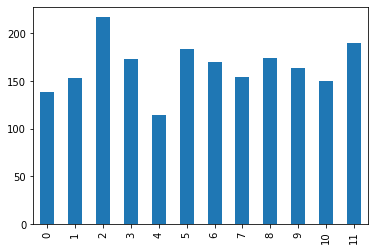

In [ ]:
compare_summ['tt'].plot(kind='bar')

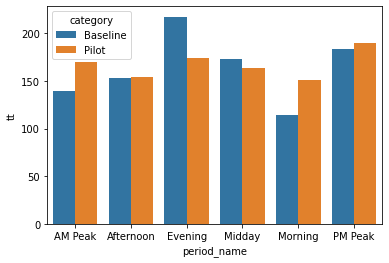

In [ ]:
# fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=compare_summ, x='period_name', y='tt', hue='category')

# ax1.legend(loc='upper left')

Text(0.5, 0, 'Period Name')

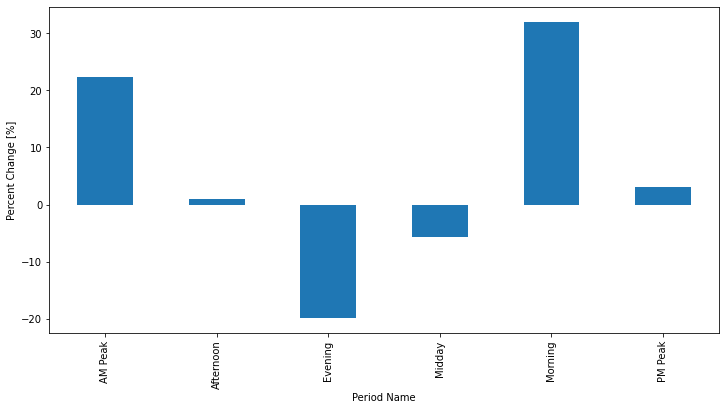

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

baseline_result['pct_diff'].plot(kind='bar', ax=ax1)

ax1.set_ylabel('Percent Change [%]')

ax1.set_xlabel('Period Name')

# Generalizing (Optional)

# Course Assignment
Answer the following question **Did traffic get better or worse?** on the following slices of the data
- Weekdays from Yonge to Jarvis
- Weekends from Jarvis to Parliament

Calculate the travel times in your analysis in **minutes**, not **seconds**.

You will be graded for completeness. If you follow the necessary steps, you will get full marks.

## Hints
- The analysis will be very similar to what we did today. You will do the same calculations but with different filters on the data.
- You may compare your answers with each other in the Slack.

## Submission
- Submit a Jupyter/Colab Notebook by sharing your saved copy of this Notebook with Adnan (adnan.rahman@weclouddata.com)
- Your submission should include all your calculation steps and an answer to the question: **"Did traffic get better or worse after the pilot?"**


# Assignment: Your Code Here

In [7]:
# Your code here
#Answer the following question Did traffic get better or worse? on the following slices of the data
#Weekdays from Yonge to Jarvis
#Weekends from Jarvis to Parliament
#Calculate the travel times in your analysis in minutes, not seconds.

df_places

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
0,DU_BA_CO_BA,Bathurst,NB,Dundas,College,510,"MULTILINESTRING ((-79.40602 43.65231, -79.4068..."
1,CO_BA_CO_UN,College,EB,Bathurst,University,1430,"MULTILINESTRING ((-79.40772 43.65648, -79.4065..."
2,CO_PA_CO_UN,College,WB,Parliament,University,1895,"MULTILINESTRING ((-79.36798 43.66429, -79.3693..."
3,CO_PA_DU_PA,Parliament,SB,College,Dundas,586,"MULTILINESTRING ((-79.36798 43.66429, -79.3678..."
4,CO_UN_CO_BA,College,WB,University,Bathurst,1430,"MULTILINESTRING ((-79.39049 43.65986, -79.3925..."
...,...,...,...,...,...,...,...
133,FR_YO_FR_UN,Front,WB,Yonge,University,448,"MULTILINESTRING ((-79.37697 43.64688, -79.3770..."
134,FR_YO_KN_YO,Yonge,NB,Front,King,259,"MULTILINESTRING ((-79.37697 43.64688, -79.3773..."
135,KN_PA_QU_PA,Parliament,NB,King,Queen,372,"MULTILINESTRING ((-79.36325 43.65273, -79.3634..."
136,FR_BA_FR_SP,Front,EB,Bathurst,Spadina,609,"MULTILINESTRING ((-79.40142 43.64075, -79.4007..."


In [ ]:
df1 = df_places[df_places['street'] == 'Yonge']

df2 = df1[df1['direction'] == 'EB']

df3 = df2[df2['from_intersection'] == 'Bathurst']

df3

In [8]:
df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3 = df2[df2['from_intersection'] == 'Yonge']

df3

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
110,KN_YO_KN_JA,King,EB,Yonge,Jarvis,509,"MULTILINESTRING ((-79.37792 43.64915, -79.3767..."


# Resources
- The world's most popular Python podcast: [Talk Python to Me](https://talkpython.fm)
- The definitive book on Pandas: [Python for Data Analysis](https://wesmckinney.com/book/)
- The BEST Introduction to Applied Statistics: [StatQuest - Joshua Starmer](https://www.youtube.com/playlist?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9)

In [ ]:
# page 6 of dec 2017 update - good bar charts